## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

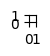

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

In [3]:
# Variables for the per capita growth rate
parts=100
step=4

#cov=np.zeros(2)
#final_abundance1=np.zeros(2)
#final_abundance2=np.zeros(2)

In [4]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

## Increasing X = N1 = N2

## Discrete-time competitive Beverton-Holt model
for i in range(parts):
    i=0
    stopRun=0
    while stopRun==0:
        per_capita1[i] = r1 / ( 1 + a11 * y_increasing[i] + a12 * y_increasing[i] )
        per_capita2[i] = r2 / ( 1 + a22 * y_increasing[i] + a21 * y_increasing[i] )
        y1_posterior[i] = y_increasing[i] * per_capita1[i]
        y2_posterior[i] = y_increasing[i] * per_capita2[i]
        per_capita1=np.append(per_capita1,per_capita1[i])
        per_capita2=np.append(per_capita2,per_capita2[i])
        y1_posterior=np.append(y1_posterior,y1_posterior[i])
        y2_posterior=np.append(y2_posterior,y2_posterior[i])
        # stops the simulation when the dynamics converges
        if(np.abs(y1_posterior[i+1]-y1_posterior[i]) and np.abs(y2_posterior[i+1]-y2_posterior[i]) < 0.001):
            stopRun=1
        i+=1
        if i>2000:
            continue

y_rel1 = np.zeros(len(y_increasing))
y_rel2 = np.zeros(len(y_increasing))
for i in range(len(y_increasing)):
    y_rel1[i]=y1_posterior[i]/(y1_posterior[i]+y2_posterior[i])
    y_rel2[i]=y2_posterior[i]/(y1_posterior[i]+y2_posterior[i])

## Discrete-time competitive Beverton-Holt model
df=open('output.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "X_increasing" + "\t" + "N1_final" + "\t" + "N2_final" + "\t" + "N1_rel_final" + "\t" + "N2_rel_final" + "\t" + "average_growth1" + "\t" + "average_growth2" + "\t" + "log_average_growth1" + "\t" + "log_average_growth2" + "\t" + "S1" + "\t" + "S2" + "\n")
for r1 in range(15,21,step):
    for r2 in range(11,21,step):
        for a11 in np.arange(0.7,3.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        X=0
                        for i in range(parts):
                            i=0
                            stopRun=0
                            while stopRun==0:
                                # calculate for the current i
                                per_capita1[i] = r1 / ( 1 + a11 * X + a12 * X )
                                per_capita2[i] = r2 / ( 1 + a22 * X + a21 * X )
                                y1_posterior[i] = X * per_capita1[i]
                                y2_posterior[i] = X * per_capita2[i]
                                y_rel1[i]=y1_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                                y_rel2[i]=y2_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                                # add the values to the vectors:
                                per_capita1=np.append(per_capita1,per_capita1[i])
                                per_capita2=np.append(per_capita2,per_capita2[i])
                                y1_posterior=np.append(y1_posterior,y1_posterior[i])
                                y2_posterior=np.append(y2_posterior,y2_posterior[i])
                                y_rel1=np.append(y_rel1,y_rel1[i])
                                y_rel2=np.append(y_rel2,y_rel2[i])
                                # stops the simulation when the dynamics converges
                                if(np.abs(y1_posterior[i+1]-y1_posterior[i]) and np.abs(y2_posterior[i+1]-y2_posterior[i]) < 0.001):
                                    stopRun=1
                                i+=1
                                if i>2000:
                                    continue
                            X+=0.5
                            S=np.array([S1,S2])
                            abundance=np.array([np.mean(y1_posterior),np.mean(y2_posterior)])#([y1[-1],y2[-1]]) # mean or final abundance?
                            final_abundance1=np.append(final_abundance1,y1_posterior[-1])
                            final_abundance2=np.append(final_abundance2,y2_posterior[-1])
                            cov=np.append(cov,np.cov(abundance, S)[0][1])
                            df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(X) + "\t" + str(y1_posterior[-1]) + "\t" + str(y2_posterior[-1]) + "\t" + str(y_rel1) + "\t" + str(y_rel2) + "\t" + str((np.average(per_capita1))) + "\t" + str((np.average(per_capita2))) + "\t" + str(np.log(np.average(per_capita1))) + "\t" + str(np.log(np.average(per_capita2))) + "\t" + str(S1) + "\t" + str(S2))
                            df.write('\n')
df.close()

## Discrete-time competitive Beverton-Holt model
df=open('output.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "X_increase" + "\t" + "N1" + "\t" + "N2" + "\t" + "N1_rel" + "\t" + "N2_rel" + "\t" + "S1" + "\t" + "S2" + "\n")
for r1 in range(15,21,step):
    for r2 in range(11,21,step):
        for a11 in np.arange(0.7,3.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        X=0
                        for i in range(parts):
                            X+=int(parts/10)
                            # calculate for the current i
                            per_capita1[i] = r1 / ( 1 + a11 * X + a12 * X )
                            per_capita2[i] = r2 / ( 1 + a22 * X + a21 * X )
                            y1_posterior[i] = X * per_capita1[i]
                            y2_posterior[i] = X * per_capita2[i]
                            y_rel1[i]=y1_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            y_rel2[i]=y2_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            S=np.array([S1,S2])
#                            print(y1_posterior[i+1],y1_posterior[i])
#                        abundance=np.array([np.mean(y1_posterior),np.mean(y2_posterior)])#([y1[-1],y2[-1]]) # mean or final abundance?
#                        final_abundance1=np.append(final_abundance1,y1_posterior[-1])
#                        final_abundance2=np.append(final_abundance2,y2_posterior[-1])
#                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                            df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(X) + "\t" + str(y1_posterior[i]) + "\t" + str(y2_posterior[i]) + "\t" + str(y_rel1[i]) + "\t" + str(y_rel2[i]) + "\t" + str(S1) + "\t" + str(S2))
                            df.write('\n')
df.close()

In [5]:
## Discrete-time competitive Beverton-Holt model
df=open('output.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "X_increase" + "\t" + "N1" + "\t" + "N2" + "\t" + "log(per_capita1)" + "\t" + "log(per_capita2)" + "\t" + "N1_rel" + "\t" + "N2_rel" + "\t" + "S1" + "\t" + "S2" + "\t" + "N1>0" + "\t" + "N2>0" + "\n")
for r1 in range(15,21,step):
    for r2 in range(11,21,step):
        for a11 in np.arange(0.7,3.1,step/10):
            for a12 in np.arange(0.1,1.1,step/10):
                for a21 in np.arange(0.1,1.1,step/10):
                    for a22 in np.arange(0.1,1.1,step/10):
                        # reset the vectors
                        per_capita1 = np.zeros(2)
                        per_capita2 = np.zeros(2)
                        y1_posterior = np.zeros(2)
                        y2_posterior = np.zeros(2)
                        y_rel1 = np.zeros(2)
                        y_rel2 = np.zeros(2)
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        X=0
                        i=0
                        stopRun=0
                        while stopRun==0:
                            X+=1#int(parts/10)
                            # calculate for the current i
                            per_capita1[i] = r1 / ( 1 + a11 * X + a12 * X )
                            per_capita2[i] = r2 / ( 1 + a22 * X + a21 * X )
                            y1_posterior[i] = X * per_capita1[i]
                            y2_posterior[i] = X * per_capita2[i]
                            y_rel1[i]=y1_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            y_rel2[i]=y2_posterior[i]/(y1_posterior[i]+y2_posterior[i])
                            # add the values to the vectors:
                            per_capita1=np.append(per_capita1,per_capita1[i])
                            per_capita2=np.append(per_capita2,per_capita2[i])
                            y1_posterior=np.append(y1_posterior,y1_posterior[i])
                            y2_posterior=np.append(y2_posterior,y2_posterior[i])
                            y_rel1=np.append(y_rel1,y_rel1[i])
                            y_rel2=np.append(y_rel2,y_rel2[i])
#                            S=np.array([S1,S2])
                            df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(X) + "\t" + str(y1_posterior[i]) + "\t" + str(y2_posterior[i])+ "\t" + str(np.log(per_capita1[i])) + "\t" + str(np.log(per_capita2[i])) + "\t" + str(y_rel1[i]) + "\t" + str(y_rel2[i]) + "\t" + str(S1) + "\t" + str(S2) + "\t" + str(y1_posterior[i]>0.1) + "\t" + str(y2_posterior[i]>0.1) )
                            df.write('\n')
                            # stops the simulation when the increase of X doesn't alter
#                            print(y1_posterior[i],y1_posterior[i-1],np.abs(y1_posterior[i]-y1_posterior[i-1]))
                            if(np.abs(y1_posterior[i]-y1_posterior[i-1]) and np.abs(y2_posterior[i]-y2_posterior[i-1]) < 0.1):
                                stopRun=1
                            i+=1
                            if i>2000:
                                continue
#                        abundance=np.array([np.mean(y1_posterior),np.mean(y2_posterior)])#([y1[-1],y2[-1]]) # mean or final abundance?
#                        final_abundance1=np.append(final_abundance1,y1_posterior[-1])
#                        final_abundance2=np.append(final_abundance2,y2_posterior[-1])
#                        cov=np.append(cov,np.cov(abundance, S)[0][1])
df.close()

## Finite Growth Rate and Stock Recruitment Curve

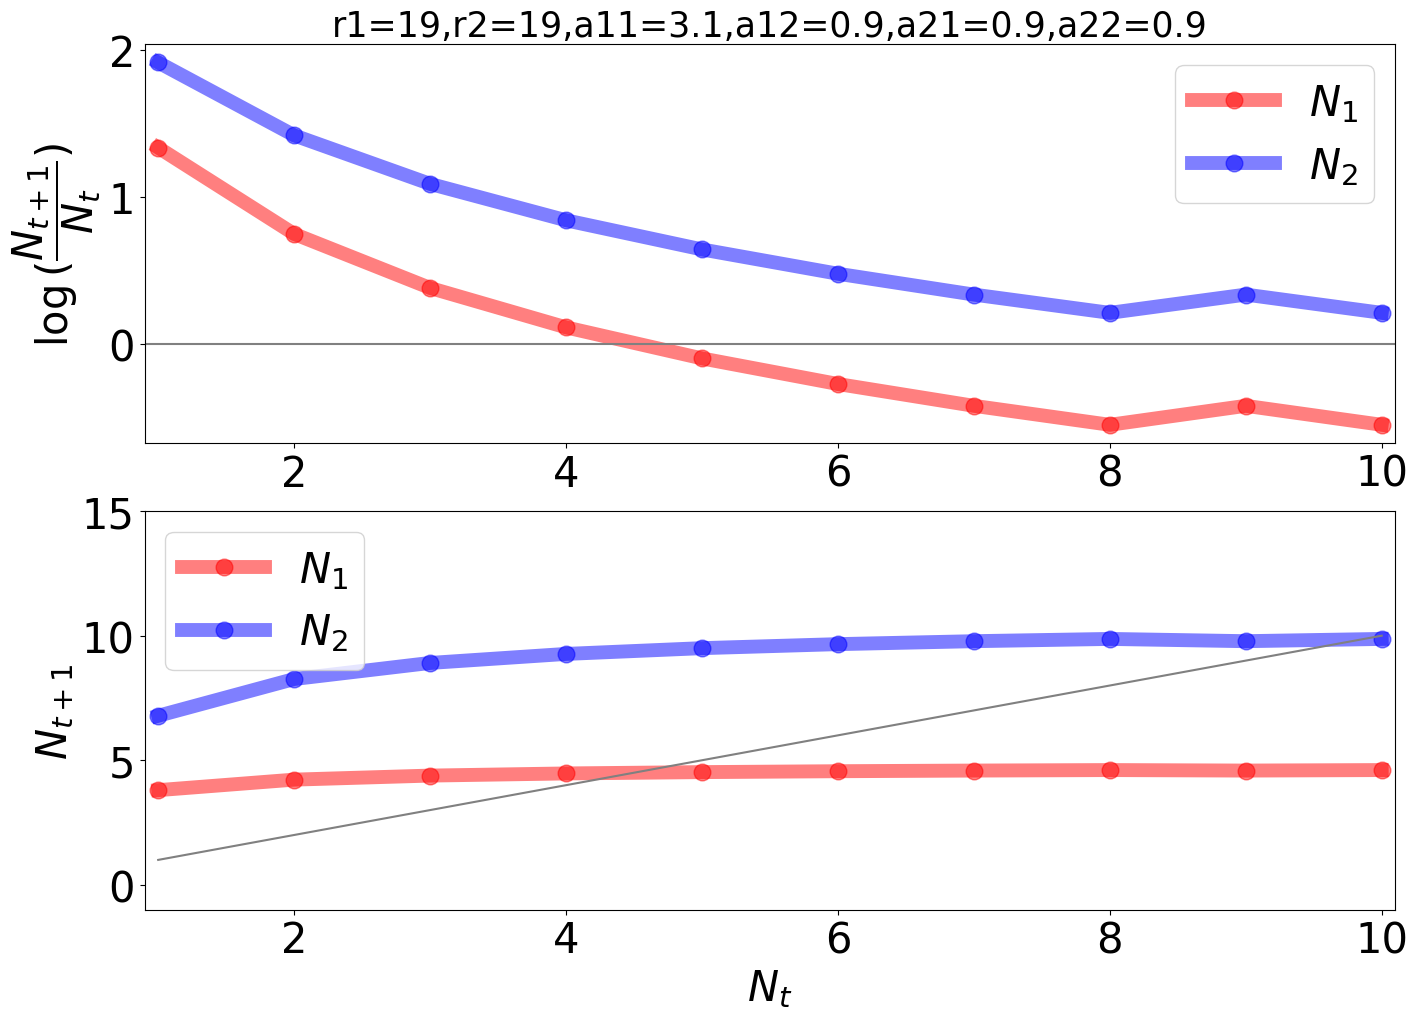

In [6]:
y_increasing = np.linspace(1,10,10)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(y_increasing, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax1.set(ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax1.set_xlim([0.9, 10.1])
ax1.plot(y_increasing, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.legend()
# Stock-Recruitment
ax2.plot(y_increasing, y1_posterior, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax2.set_xlim([0.9, 10.1])
ax2.set_ylim([-1, 15])
ax2.set(xlabel='$N_{t}$', ylabel='$N_{t+1}$')
ax2.plot(y_increasing, y2_posterior, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax2.plot(y_increasing,y_increasing, color="grey") # add a straight line
ax2.legend()
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/increasing_finite_growth_rate_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

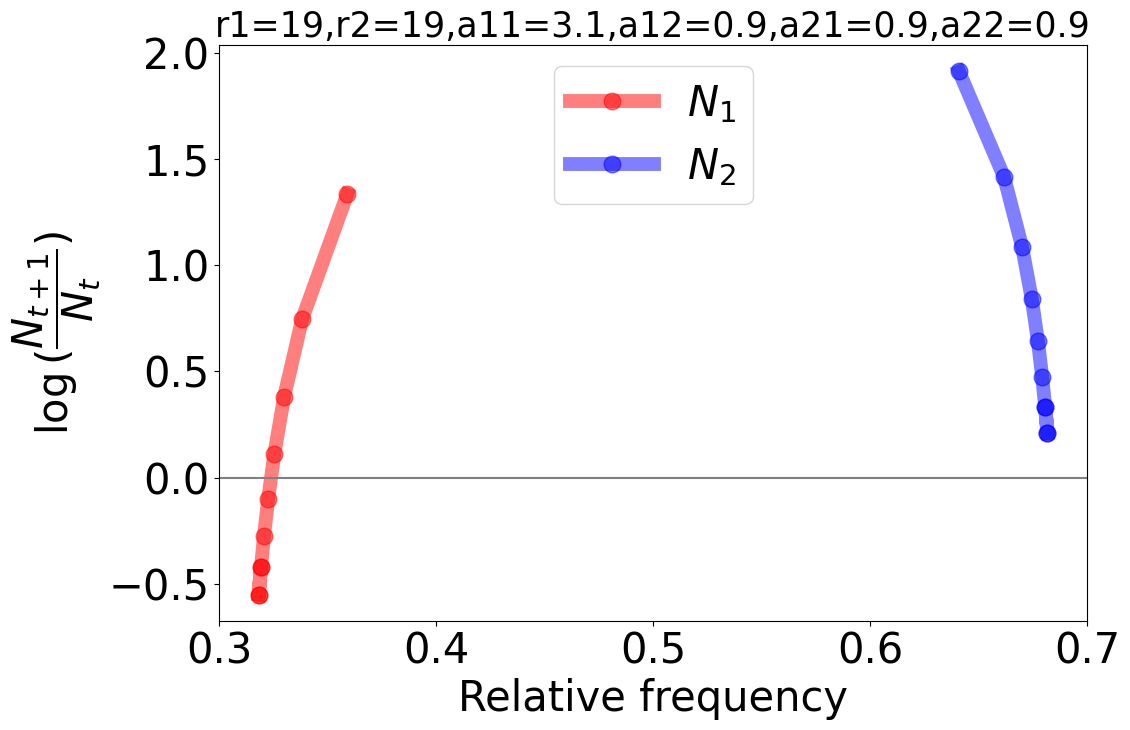

In [7]:
fig, ax = plt.subplots(1,figsize=(12, 8))
ax.plot(y_rel1, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y_rel2, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Relative frequency',ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_yenni_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()

# Dynamics

In [8]:
# Variables for the per capita growth rate
tmax = 2
time = np.linspace(1,tmax,tmax)

y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita2 = np.zeros(tmax)

y1[0] = 10#y1_posterior[-1] # initial conditions
y2[0] = 1#y2_posterior[-1]

In [9]:
## Discrete-time competitive Beverton-Holt model
i=0
stopRun=0
while stopRun==0: # stops the simulation when the dynamics converges
    per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1[i+1] = y1[i] * per_capita1[i]
    y2[i+1] = y2[i] * per_capita2[i]
    per_capita1=np.append(per_capita1,per_capita1[i])
    per_capita2=np.append(per_capita2,per_capita2[i])
    y1=np.append(y1,y1[i])
    y2=np.append(y2,y2[i])
    if(np.abs(y1[i+1]-y1[i]) and np.abs(y2[i+1]-y2[i]) < 0.01):
        stopRun=1
    i+=1 # i=i+1

In [10]:
y_rel1 = np.zeros(len(y1))
y_rel2 = np.zeros(len(y1))
for i in range(len(y1)):
    y_rel1[i]=y1[i]/(y1[i]+y2[i])
    y_rel2[i]=y2[i]/(y1[i]+y2[i])

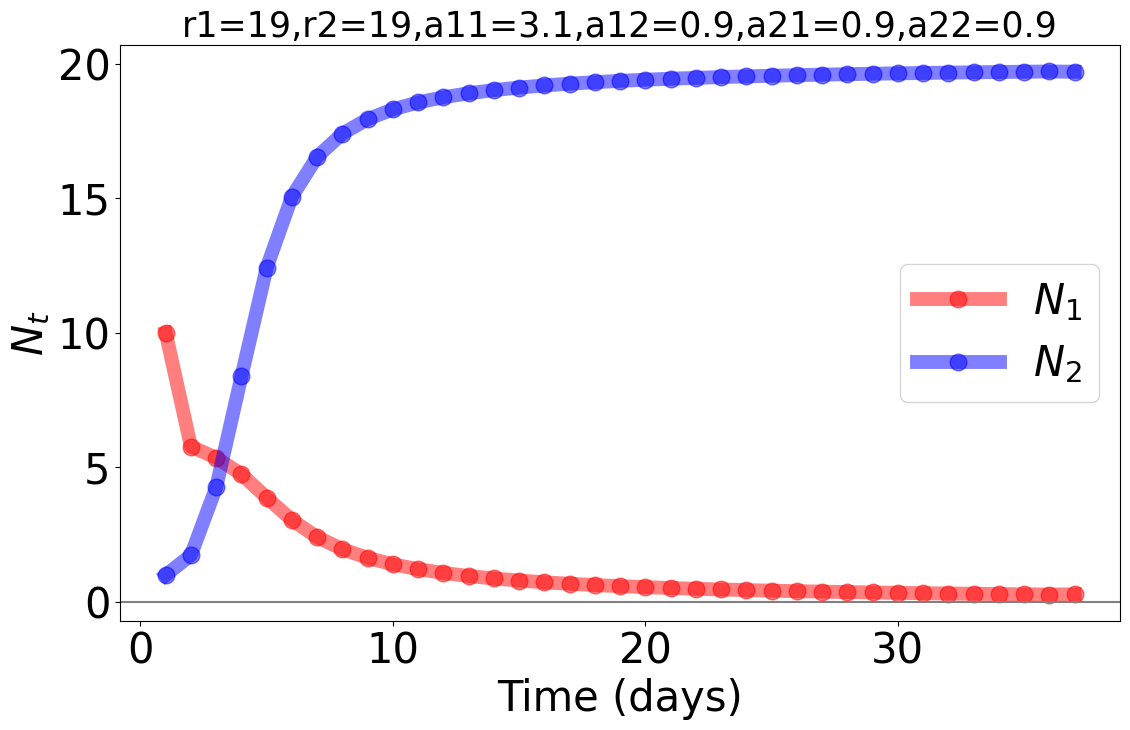

In [11]:
time = np.linspace(1,len(y1),len(y1))

fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(time, y1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, y2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()

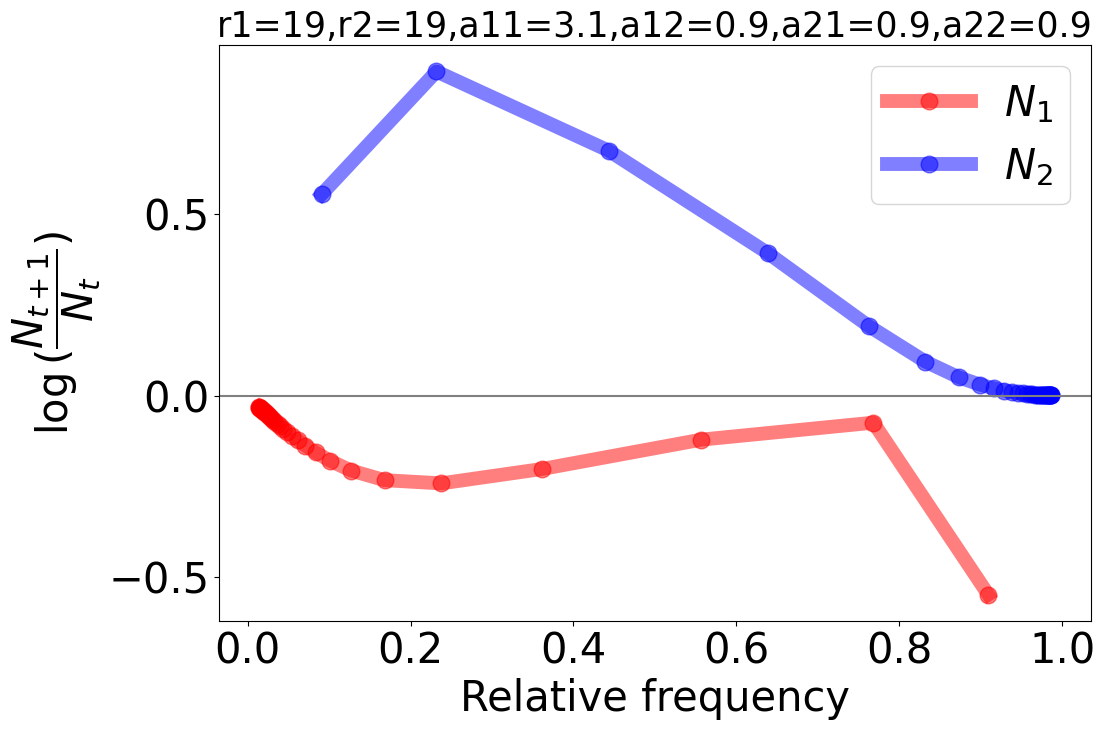

In [12]:
fig, ax = plt.subplots(1,figsize=(12, 8))
ax.plot(y_rel1, np.log(per_capita1), alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(y_rel2, np.log(per_capita2), alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Relative frequency',ylabel='$\log{(\dfrac{N_{t+1}}{N_t})}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1)), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_yenni_r1_'+str(np.around(r1,1))+'_r2_'+str(np.around(r2,1))+'_a11_'+str(np.around(a11,1))+'_a12_'+str(np.around(a12,1))+'_a21_'+str(np.around(a21,1))+'_a22_'+str(np.around(a22,1))+'.png', format='png', dpi=50)
plt.show()